In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import sys,os,os.path
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import numpy as np
import pandas as pd

In [141]:
from invisible_cities.cities.components import track_blob_info_creator_extractor
from invisible_cities.io.hits_io        import load_hits
from invisible_cities.io.hits_io        import hits_from_df
from invisible_cities.core              import system_of_units as units
from invisible_cities.types.symbols     import HitEnergy
from invisible_cities.evm.event_model   import HitCollection
from invisible_cities.evm.event_model   import Cluster
from invisible_cities.evm.event_model   import Hit
from invisible_cities.types.ic_types    import xy
from invisible_cities.reco.paolina_functions import voxelize_hits

from   matplotlib.animation import FuncAnimation
import matplotlib.pyplot    as     plt
import matplotlib.colors    as     colors
import matplotlib.cm        as     cm
from matplotlib.colors import Normalize

In [143]:
def plot_voxels(df, base_vsize = 12):

    xs = df.X
    ys = df.Y
    zs = df.Z
    es = df.E

    the_hits = []
    for x, y, z, e in zip(xs, ys, zs, es):
        if np.isnan(e): continue
        h = Hit(0, Cluster(0, xy(x,y), xy(0,0), 0), z, e*1000, xy(0,0))
        the_hits.append(h)
    
    voxels = voxelize_hits(the_hits,
                           np.array([base_vsize, base_vsize, base_vsize]), False)
    
    vsizex = voxels[0].size[0]
    vsizey = voxels[0].size[1]
    vsizez = voxels[0].size[2]

    min_corner_x = min(v.X for v in voxels) - vsizex/2.
    min_corner_y = min(v.Y for v in voxels) - vsizey/2.
    min_corner_z = min(v.Z for v in voxels) - vsizez/2.

    
    x = [np.round(v.X/vsizex) for v in voxels]
    y = [np.round(v.Y/vsizey) for v in voxels]
    z = [np.round(v.Z/vsizez) for v in voxels]
    e = [v.E for v in voxels]

    x_min = int(min(x))
    y_min = int(min(y))
    z_min = int(min(z))

    x_max = int(max(x))
    y_max = int(max(y))
    z_max = int(max(z))

    VOXELS = np.zeros((x_max-x_min+1, y_max-y_min+1, z_max-z_min+1))
    #print(VOXELS.shape)

    # sort through the event set the "turn on" the hit voxels
    cmap = cm.viridis
    norm = Normalize(vmin=0, vmax=max(e))

    colors = np.empty(VOXELS.shape, dtype=object)
    for q in range(0,len(z)):
        VOXELS[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = 1
        colors[int(x[q])-x_min][int(y[q])-y_min][int(z[q])-z_min] = cmap(norm(e[q]))

    # and plot everything
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    #a,b,c is spacing in mm needs an extra dim
    a,b,c = np.indices((x_max-x_min+2, y_max-y_min+2, z_max-z_min+2))
    a = a*vsizex + min_corner_x
    b = b*vsizey + min_corner_y
    c = c*vsizez + min_corner_z

    # a, b, c are the corners of the voxels
    ax.voxels(a,b,c, VOXELS, facecolors=colors , edgecolor='k',alpha=0.8)

    ax.set_xlabel('x (mm)')#,fontsize=16)
    ax.set_ylabel('y (mm)')#,fontsize=16)
    ax.set_zlabel('z (mm)')#,fontsize=16)


    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cb = fig.colorbar(sm)
    cb.set_label('Energy (keV)')

    fig.suptitle('voxelised_plot_two_tracks')

    #ax.view_init(-160, 90)

    plt.show(fig)

In [144]:
# create hit collection (look at how the tests do it, there are probably fixtures)
#ICTDIR = '/home/e78368jw/Documents/NEXT_CODE/IC/invisible_cities/'
#ICDATADIR = os.path.join(ICTDIR, "database/test_data/")
#hits_file_name = os.path.join(ICDATADIR, "Kr_hits_for_psf_0.h5")
#hits_file_name = '/home/e78368jw/Downloads/sophronia_1_208Tl.h5'
#hits = load_hits(hits_file_name)

In [181]:
tr_1 = []
for i in range(0, 5):
    z_1 = np.random.uniform(low = 1 * units.mm, high = 20 * units.mm)
    z_2 = np.random.uniform(low = 1 * units.mm, high = 20 * units.mm)
    tr_1.append([0, 1, (9 * i + 1) * units.mm, 0 * units.mm, z_1, 1, 10, 10])
    tr_1.append([0, 1, (9 * i + 1) * units.mm + 1, 30 * units.mm, z_2, 1, 10, 10])

data = pd.DataFrame(tr_1, columns = ['event', 'npeak', 'X', 'Y', 'Z', 'Q', 'E', 'Ep'])

display(data)

,event,npeak,X,Y,Z,Q,E,Ep
0,0,1,1.0,0.0,16.932703,1,10,10
1,0,1,2.0,30.0,16.302170,1,10,10
2,0,1,10.0,0.0,11.685613,1,10,10
3,0,1,11.0,30.0,19.886045,1,10,10
4,0,1,19.0,0.0,6.586183,1,10,10
5,0,1,20.0,30.0,9.395341,1,10,10
6,0,1,28.0,0.0,4.637143,1,10,10
7,0,1,29.0,30.0,9.651017,1,10,10
8,0,1,37.0,0.0,5.016793,1,10,10
9,0,1,38.0,30.0,6.492715,1,10,10


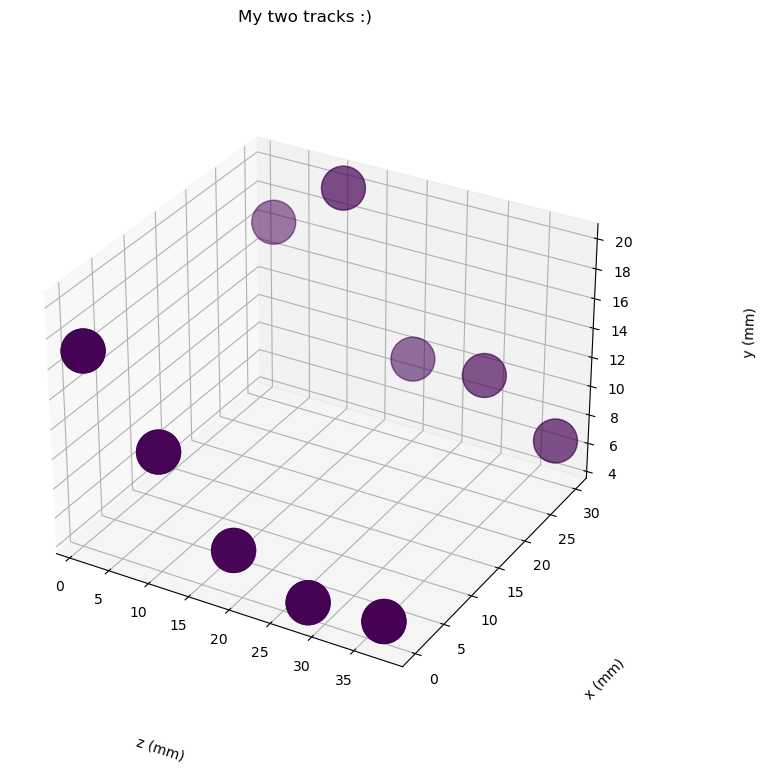

In [187]:
plt.ion()
ax = plt.figure(figsize=(10,8)).add_subplot(projection='3d')
for Y, df in data.groupby(['Y']):
    ax.scatter(data.X, data.Y, data.Z, c=data.E, s=1000, label = f'{Y}')
ax.set_xlabel("z (mm)", labelpad=50)
ax.set_ylabel("x (mm)", labelpad=50)
ax.set_zlabel("y (mm)", labelpad=50)
plt.suptitle("My two tracks :)")

plt.show()

/tmp/ipykernel_31527/96440492.py:53: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


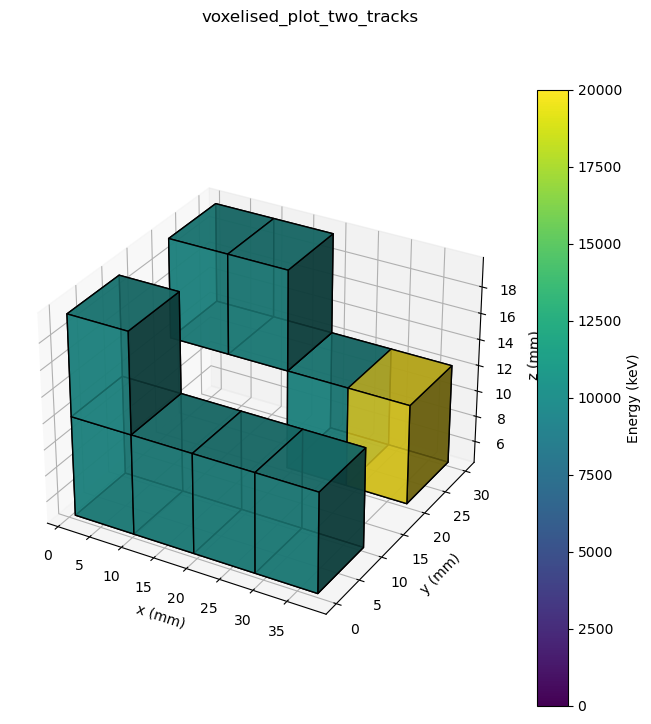

In [183]:
plot_voxels(data)

In [184]:
topological_creator = track_blob_info_creator_extractor((12 * units.mm, 12 * units.mm, 12 * units.mm),
                                                        False,
                                                        10 * units.keV,
                                                        3,
                                                        27 * units.mm,
                                                        1000000
                                                        )

In [185]:
hits_lol = hits_from_df(data)

df, track_hitc, out_of_map = topological_creator(hits_lol[0])

df


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z


hit_energies


array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

10
True
track_hitc


HitCollectionHit list:<Hit : npeak = 1.0 z = 11.685612743664143 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=10.0, y=0.0) 3dHit = Hit(10.0, 0.0, 11.685612743664143, E=10.0)  > ><Hit : npeak = 1.0 z = 16.932702754864042 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=1.0, y=0.0) 3dHit = Hit(1.0, 0.0, 16.932702754864042, E=10.0)  > ><Hit : npeak = 1.0 z = 6.586183440599341 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=19.0, y=0.0) 3dHit = Hit(19.0, 0.0, 6.586183440599341, E=10.0)  > ><Hit : npeak = 1.0 z = 4.6371428208058685 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=28.0, y=0.0) 3dHit = Hit(28.0, 0.0, 4.6371428208058685, E=10.0)  > ><Hit : npeak = 1.0 z = 5.016793460909805 XYpeak = -1000, -

In [186]:
display(df)
display(track_hitc)
display(out_of_map)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
0,0,0,50.0,30.487275,5,5,2,1.0,0.0,4.637143,...,16.932703,37.0,0.0,5.016793,30.0,30.0,10.0,9.25,10.0,7.624451
1,0,1,50.0,30.487275,4,5,2,2.0,30.0,6.492715,...,8.071866,2.0,30.0,16.302170,40.0,30.0,20.0,9.25,10.0,7.624451


HitCollectionHit list:<Hit : npeak = 1.0 z = 11.685612743664143 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=10.0, y=0.0) 3dHit = Hit(10.0, 0.0, 11.685612743664143, E=10.0)  > ><Hit : npeak = 1.0 z = 16.932702754864042 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=1.0, y=0.0) 3dHit = Hit(1.0, 0.0, 16.932702754864042, E=10.0)  > ><Hit : npeak = 1.0 z = 6.586183440599341 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=19.0, y=0.0) 3dHit = Hit(19.0, 0.0, 6.586183440599341, E=10.0)  > ><Hit : npeak = 1.0 z = 4.6371428208058685 XYpeak = -1000, -1000 E = 10.0 Ec = -1 Ep = 10.0 trackid = 0 cluster =< nsipm = -1 Q = 1.0
                    xy = xy(x=28.0, y=0.0) 3dHit = Hit(28.0, 0.0, 4.6371428208058685, E=10.0)  > ><Hit : npeak = 1.0 z = 5.016793460909805 XYpeak = -1000, -

False